In [1]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import pandas_datareader as  web
import matplotlib.pyplot as pp
from datetime import datetime, timedelta, date

In [2]:
start = datetime(1970,1,2)
end = datetime(2021,12,31)

df_SPY = pdr.DataReader('SPY','yahoo',start,end) #미국 주식
df_EFA = pdr.DataReader('EFA','yahoo',start,end) #미국 외 선진국 주식
df_IEF = pdr.DataReader('IEF','yahoo',start,end) #금
df_DBC = pdr.DataReader('DBC','yahoo',start,end) #원자재
df_VNQ = pdr.DataReader('VNQ','yahoo',start,end) #금

In [3]:
#LOG 수익률 계산
SPY_PROFIT = df_SPY['Close'].pct_change()*100
SPY_PROFIT.iloc[0] = 0

EFA_PROFIT = df_EFA['Close'].pct_change()*100
EFA_PROFIT.iloc[0] = 0

IEF_PROFIT = df_IEF['Close'].pct_change()*100
IEF_PROFIT.iloc[0] = 0

DBC_PROFIT = df_DBC['Close'].pct_change()*100
DBC_PROFIT.iloc[0] = 0

VNQ_PROFIT = df_VNQ['Close'].pct_change()*100
VNQ_PROFIT.iloc[0] = 0

In [4]:
SPY_LOG_PROFIT = np.log(SPY_PROFIT +1)
EFA_LOG_PROFIT = np.log(EFA_PROFIT +1)
IEF_LOG_PROFIT = np.log(IEF_PROFIT +1)
DBC_LOG_PROFIT = np.log(DBC_PROFIT +1)
VNQ_LOG_PROFIT = np.log(VNQ_PROFIT +1)

C:\Users\sjo20\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
#LOG 누적 수익률
SPY_LOG_PROFIT_ACC = SPY_LOG_PROFIT.cumsum()
EFA_LOG_PROFIT_ACC = EFA_LOG_PROFIT.cumsum()
IEF_LOG_PROFIT_ACC = IEF_LOG_PROFIT.cumsum()
DBC_LOG_PROFIT_ACC = DBC_LOG_PROFIT.cumsum()
VNQ_LOG_PROFIT_ACC = VNQ_LOG_PROFIT.cumsum()

In [6]:
pf = (SPY_LOG_PROFIT_ACC * 0.2) + (EFA_LOG_PROFIT_ACC * 0.2) + (IEF_LOG_PROFIT_ACC * 0.2) + (DBC_LOG_PROFIT_ACC * 0.2) + (VNQ_LOG_PROFIT_ACC * 0.2)

pf = pf.dropna()
pf

Date
2006-02-06      1.308477
2006-02-08      0.221609
2006-02-09      0.449911
2006-02-14      0.123964
2006-02-16      0.376914
                 ...    
2021-12-27    152.551104
2021-12-28    152.558286
2021-12-29    152.612522
2021-12-30    152.421526
2021-12-31    152.239340
Name: Close, Length: 2622, dtype: float64

In [7]:
pf_data = (df_SPY['Close']*0.2) +(df_EFA['Close']*0.2) +(df_IEF['Close']*0.2) +(df_DBC['Close']*0.2) +(df_VNQ['Close']*0.2)

pf_data = pf_data.dropna()
pf_data

Date
2006-02-06     71.880000
2006-02-07     71.304002
2006-02-08     71.490000
2006-02-09     71.592001
2006-02-10     71.488001
                 ...    
2021-12-27    161.332003
2021-12-28    161.331998
2021-12-29    161.504003
2021-12-30    161.322001
2021-12-31    161.085999
Name: Close, Length: 4005, dtype: float64

In [8]:
window = 20
max_window = pf_data.rolling(window, min_periods=1).max()
dd=((pf_data/max_window)-1)*100
mdd = dd.rolling(window,min_periods=1 ).min()

print(mdd)

Date
2006-02-06    0.000000
2006-02-07   -0.801334
2006-02-08   -0.801334
2006-02-09   -0.801334
2006-02-10   -0.801334
                ...   
2021-12-27   -3.776827
2021-12-28   -3.776827
2021-12-29   -3.776827
2021-12-30   -2.903804
2021-12-31   -2.903804
Name: Close, Length: 4005, dtype: float64


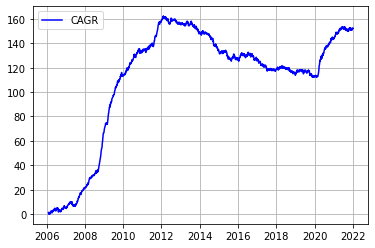

In [9]:
plt.plot(pf.index, pf,'b',label='CAGR')

plt.grid(True)
plt.legend(loc='best')
plt.show()

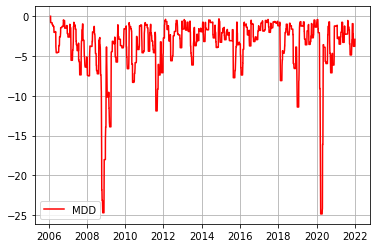

In [10]:
plt.plot(mdd.index, mdd, 'r', label='MDD')

plt.grid(True)
plt.legend(loc='best')
plt.show()